In [1]:
# Basic Import
import pandas as pd
import numpy as np

# Machine Learning Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import GridSearchCV


#Plotting Imports
from matplotlib import pyplot as pp
import seaborn as sns
%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
training_file = pd.read_csv("train.csv")
testing_file = pd.read_csv("test.csv")
train_df = training_file.copy(deep=True)
test_df = testing_file.copy(deep=True)

In [3]:
print("The shape of train data and test data are: " + "%s and %s" % (training_file.shape, testing_file.shape))

The shape of train data and test data are: (188318, 132) and (125546, 131)


In [4]:
train_id = training_file['id']
test_id = testing_file['id']
loss = training_file['loss']

training_file.drop('id',axis=1,inplace=True)
testing_file.drop('id',axis=1,inplace=True)
training_file.drop('loss',axis=1,inplace=True)

In [5]:
print("The shape of train data and test data are: " + "%s and %s" % (training_file.shape, testing_file.shape))

The shape of train data and test data are: (188318, 130) and (125546, 130)


### Column 0-115(index) are categorical, 116 - 129 are numeric
### Create Dummy Variables 


In [6]:

dummies_train = pd.get_dummies(training_file[training_file.columns[:116]])
dummies_test = pd.get_dummies(testing_file[testing_file.columns[:116]])
print("The shape of train data and test data are: " + "%s and %s" % (dummies_train.shape, dummies_test.shape))

The shape of train data and test data are: (188318, 1139) and (125546, 1102)


### Deleting columns not present in the test data

In [7]:
for column in dummies_test.columns:
    if column not in dummies_train.columns:
        dummies_test.drop(column,axis=1,inplace=True)

### Deleting columns not present in the train data

In [8]:
for column in dummies_train.columns:
    if column not in dummies_test.columns:
        dummies_train.drop(column,axis=1,inplace=True)

In [9]:
print("The shape of new train data and new test data are: " + "%s and %s" % (dummies_train.shape, dummies_test.shape))

The shape of new train data and new test data are: (188318, 1065) and (125546, 1065)


### check if the columns in both the dataset have a mismatch


In [10]:

mismatch = 0
for i in range(len(dummies_train.columns)):
    if dummies_train.columns[i] != dummies_test.columns[i]:
        mismatch+=1
print("We have %d mismatch" %(mismatch))

We have 0 mismatch


### Normalize numeric variables using Min-Max-Scaler

In [11]:

numeric_train = training_file[training_file.columns[116:]]
numeric_test = testing_file[testing_file.columns[116:]]

min_max_scaler = MinMaxScaler().fit(numeric_train)

#Apply min max scaler
train_norm = min_max_scaler.transform(numeric_train)
test_norm = min_max_scaler.transform(numeric_test)

#Convert numeric normalized values to a dataframe
train_norm = pd.DataFrame(train_norm,columns=list(numeric_train.columns))
test_norm = pd.DataFrame(test_norm,columns=list(numeric_test.columns))

print("The shape of new train data and new test data are: " + "%s and %s" % (train_norm.shape, test_norm.shape))

The shape of new train data and new test data are: (188318, 14) and (125546, 14)


### Check correlation on cont variables

In [12]:

print(train_norm.corr())

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

### Correlation between continuous predictors and traget

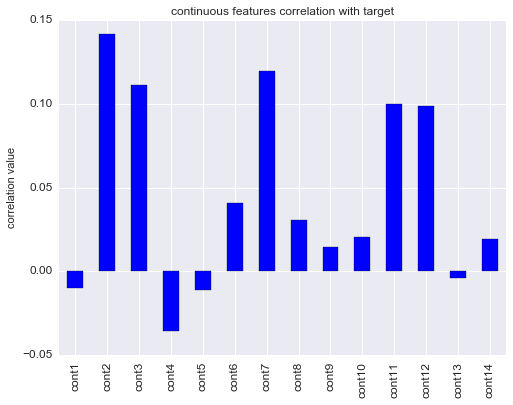

In [13]:
train_corr_loss = train_df.corr()["loss"]
ax = train_corr_loss.iloc[1:-1].plot(kind='bar',title="continuous features correlation with target", figsize=(8,6), fontsize=12)
ax.set_ylabel("correlation value")

### BoxPlot for continuous variables

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(-0.1, 1.1)

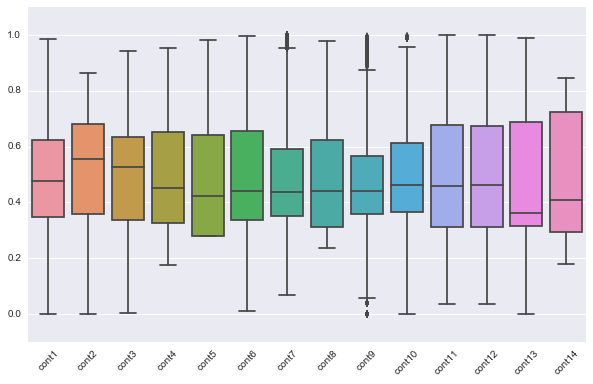

In [14]:
fig,ax = pp.subplots(figsize=(10,6))
sns.boxplot(x=numeric_train)
ticks = pp.setp(ax.get_xticklabels(),rotation=45)
pp.title("")
pp.ylim(-.1,1.1)

### Numeric Feature Correlation Matrix

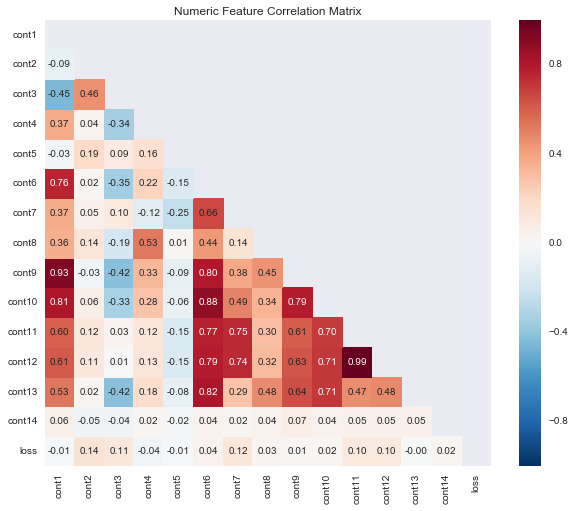

In [15]:
correlation = train_df[train_df.columns[116:]].corr(method='pearson')
fig,ax = pp.subplots(figsize=(10,8))
# sns.heatmap(correlation,annot=True,ax=ax,fmt='2.2f')
# # pp.xlabel('Column')
# # pp.ylabel('Column')


mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(correlation, mask=mask, square=True, ax=ax, fmt = '2.2f', annot=True)
    
pp.title('Numeric Feature Correlation Matrix')

### Principal Component Analysis

In [16]:

pca = PCA(n_components=6)
pca.fit(train_norm)

train_norm_pca = pca.transform(train_norm)
print(pca.explained_variance_ratio_)

test_norm_pca = pca.transform(test_norm)
print(pca.explained_variance_ratio_)

#Convert them to dataframes
train_norm_pca = pd.DataFrame(train_norm_pca,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6"])
test_norm_pca = pd.DataFrame(test_norm_pca,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6"])

[ 0.34403352  0.15023056  0.1443056   0.11971314  0.08321672  0.05186105]
[ 0.34403352  0.15023056  0.1443056   0.11971314  0.08321672  0.05186105]


### Put dummies and PCA together

In [17]:
final_train = pd.concat((dummies_train,train_norm_pca),axis=1)
final_test = pd.concat((dummies_test,test_norm_pca),axis=1)

print("the shape of final train data and test data is: "+"%s and %s"%(final_train.shape,final_test.shape))

the shape of final train data and test data is: (188318, 1071) and (125546, 1071)


### Distribution of target variable "loss"

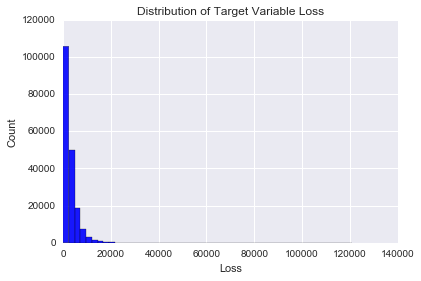

In [18]:
sns.distplot(loss,color='b',hist_kws={'alpha':0.9},kde=False)
pp.ylabel('Count')
pp.xlabel('Loss')
pp.title('Distribution of Target Variable Loss')

### log loss is way better

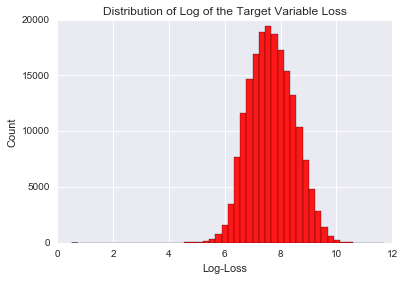

In [19]:
log_loss = np.log1p(loss)
sns.distplot(log_loss,color='r',hist_kws={'alpha':0.9},kde=False)
pp.ylabel('Count')
pp.xlabel('Log-Loss')
pp.title('Distribution of Log of the Target Variable Loss')

In [20]:
# Delete redundant variables to free some memory
del dummies_test, dummies_train, numeric_train, numeric_test, train_norm, test_norm

## Creating set of Classifiers

In [59]:
# alphas = np.logspace(-5, 1, 60)

clfs = {}
# 1 Linear Regression
clfs ['lg'] = {'clf' : LinearRegression(), 'name' : 'LinearRegression'}

# 2 Random forest
# parameters_rfc = {'n_estimators':[20,50,100],'max_depth':[4,None],'max_features':[2,4],
#                   'criterion':['mse'],'min_samples_split': [1, 3, 10],'min_samples_leaf': [1, 3, 10],
#                   'bootstrap':[True,False]}
clfs['rfc'] = {'clf': RandomForestRegressor(n_estimators = 22,criterion='mse'),'name':'Random Forest '}

# 3 Lasso Regression
# parameters_lasso = {'alpha':np.logspace(-3,1,10)}
clfs['lasso'] = {'clf' : Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), 'name' : 'Lasso'}

# 4 Ridge regression
# parameters_ridge = {'alpha':np.logspace(-3,1,10),'solver':['sag','auto','lsqr']}
clfs['ridge'] = {'clf' : Ridge(alpha=0.1,solver='auto'), 'name' : 'Ridge'}

# 5 ElasticNet Regression
# parameters_elastic = {'alpha':np.logspace(-3,1,10),'l1_ratio':[0.2]}
clfs['elastic'] = {'clf' : ElasticNet(alpha=0.1,l1_ratio=0.2) , 'name' : 'ElasticNet'}

# 6 SGD Regression
# parameters_sgd = {'loss':['squared_loss','huber'],'penalty':['l1','l2'],'alpha':np.logspace(-3,1,10),
#                  'learning_rate' :['constant','optimal','invscaling'],'eta0' : [0.01],'power_t': [0.25]}
clfs['sgd'] = {'clf' : SGDRegressor(loss='squared_loss',penalty='l2',alpha=0.1), 'name' : 'SGD'}

# 7 MLP Neural Network
# parameters_mlp = {'hidden_layer_sizes' : np.arange(5,12),'solver':['lbgfs'],'activation':['identity','logistic','tanh','relu'],
#                  'max_iter':[1500],'alpha':10.0 ** -np.arange(1,7)}
clfs['mlp'] = {'clf': MLPRegressor(hidden_layer_sizes=(100,100,100), alpha=0.01, solver='lbgfs'),
'name': 'MultilayerPerceptron'}

# 8 Gradient Boosting
clfs['gb'] = {'clf': GradientBoostingRegressor(n_estimators=200, random_state=0), 'name':'Gradient Boosting'}

In [22]:
X_train,X_test,y_train,y_test = train_test_split(final_train,log_loss,test_size=0.3,random_state = np.random.randint(500))

## Random Forest

In [27]:
model = clfs['rfc']['clf'].fit(X_train,y_train)
predict_rfc = clfs['rfc']['clf'].predict(X_test)
clfs['rfc']['variance score_test'] = clfs['rfc']['clf'].score(X_test,y_test)
clfs['rfc']['variance score_train'] = clfs['rfc']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['variance score_test']))
print("Variance Score for train:" + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['variance score_train']))

clfs['rfc']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['mse']))


Variance Score for test:Random Forest  : 0.4922 
Variance Score for train:Random Forest  : 0.9212 
MSE for: Random Forest  : 0.3303 


## Elastic Net

In [23]:
model = clfs['elastic']['clf'].fit(X_train,y_train)
predict_rfc = clfs['elastic']['clf'].predict(X_test)
clfs['elastic']['variance score_test'] = clfs['elastic']['clf'].score(X_test,y_test)
clfs['elastic']['variance score_train'] = clfs['elastic']['clf'].score(X_train,y_train)

print("Variance Score for test :" + clfs['elastic']['name'] + " : %0.4f " % (clfs['elastic']['variance score_test']))
print("Variance Score for train :" + clfs['elastic']['name'] + " : %0.4f " % (clfs['elastic']['variance score_train']))

clfs['elastic']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['elastic']['name'] + " : %0.4f " % (clfs['elastic']['mse']))


Variance Score for test :ElasticNet : 0.3624 
Variance Score for train :ElasticNet : 0.3647 
MSE for: ElasticNet : 0.4148 


## Lasso Regression

In [24]:
model = clfs['lasso']['clf'].fit(X_train,y_train)
predict_rfc = clfs['lasso']['clf'].predict(X_test)
clfs['lasso']['variance score_test'] = clfs['lasso']['clf'].score(X_test,y_test)
clfs['lasso']['variance score_train'] = clfs['lasso']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['lasso']['name'] + " : %0.4f " % (clfs['lasso']['variance score_test']))
print("Variance Score for train:" + clfs['lasso']['name'] + " : %0.4f " % (clfs['lasso']['variance score_train']))

clfs['lasso']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['lasso']['name'] + " : %0.4f " % (clfs['lasso']['mse']))


Variance Score for test:Lasso : 0.1547 
Variance Score for train:Lasso : 0.1551 
MSE for: Lasso : 0.5499 


## Ridge Regression

In [25]:
model = clfs['ridge']['clf'].fit(X_train,y_train)
predict_rfc = clfs['ridge']['clf'].predict(X_test)
clfs['ridge']['variance score_test'] = clfs['ridge']['clf'].score(X_test,y_test)
clfs['ridge']['variance score_train'] = clfs['ridge']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['ridge']['name'] + " : %0.4f " % (clfs['ridge']['variance score_test']))
print("Variance Score for train:" + clfs['ridge']['name'] + " : %0.4f " % (clfs['ridge']['variance score_train']))

clfs['ridge']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['ridge']['name'] + " : %0.4f " % (clfs['ridge']['mse']))


Variance Score for test:Ridge : 0.5138 
Variance Score for train:Ridge : 0.5236 
MSE for: Ridge : 0.3163 


## SGD

In [26]:
model = clfs['sgd']['clf'].fit(X_train,y_train)
predict_rfc = clfs['sgd']['clf'].predict(X_test)
clfs['sgd']['variance score_test'] = clfs['sgd']['clf'].score(X_test,y_test)
clfs['sgd']['variance score_train'] = clfs['sgd']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['sgd']['name'] + " : %0.4f " % (clfs['sgd']['variance score_test']))
print("Variance Score for train:" + clfs['sgd']['name'] + " : %0.4f " % (clfs['sgd']['variance score_train']))

clfs['sgd']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['sgd']['name'] + " : %0.4f " % (clfs['sgd']['mse']))


Variance Score for test:SGD : 0.4686 
Variance Score for train:SGD : 0.4716 
MSE for: SGD : 0.3457 


## MLPRegressor

In [28]:
model = clfs['mlp']['clf'].fit(X_train,y_train)
predict_rfc = clfs['mlp']['clf'].predict(X_test)
clfs['mlp']['variance score_test'] = clfs['mlp']['clf'].score(X_test,y_test)
clfs['mlp']['variance score_train'] = clfs['mlp']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['mlp']['name'] + " : %0.4f " % (clfs['mlp']['variance score_test']))
print("Variance Score for train:" + clfs['mlp']['name'] + " : %0.4f " % (clfs['mlp']['variance score_train']))

clfs['mlp']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['mlp']['name'] + " : %0.4f " % (clfs['mlp']['mse']))

Variance Score for test:MultilayerPerceptron : 0.5413 
Variance Score for train:MultilayerPerceptron : 0.5538 
MSE for: MultilayerPerceptron : 0.2984 


## Gradient boosting classifier

In [29]:
model = clfs['gb']['clf'].fit(X_train,y_train)
predict_rfc = clfs['gb']['clf'].predict(X_test)
clfs['gb']['variance score_test'] = clfs['gb']['clf'].score(X_test,y_test)
clfs['gb']['variance score_train'] = clfs['gb']['clf'].score(X_train,y_train)

print("Variance Score for test:" + clfs['gb']['name'] + " : %0.4f " % (clfs['gb']['variance score_test']))
print("Variance Score for train:" + clfs['gb']['name'] + " : %0.4f " % (clfs['gb']['variance score_train']))

clfs['gb']['mse'] = (np.mean((predict_rfc - y_test) ** 2))
print("MSE for: " + clfs['gb']['name'] + " : %0.4f " % (clfs['gb']['mse']))

Variance Score for test:Gradient Boosting : 0.5276 
Variance Score for train:Gradient Boosting : 0.5360 
MSE for: Gradient Boosting : 0.3073 


## Top 500 features for random forest

In [98]:
model = clfs['rfc']['clf'].fit(final_train,log_loss)

In [102]:
feature_impportances =  sorted(zip(clfs['rfc']['clf'].feature_importances_,final_train.columns.values),reverse=True)
important_features_df = pd.DataFrame(feature_impportances,columns=["importance","feature"])
top_500_important_features_train = final_train[final_train[important_features_df["feature"]].columns[:501]]
top_100_important_features_train = final_train[final_train[important_features_df["feature"]].columns[:101]]

In [100]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(top_500_important_features_train,log_loss,test_size=0.3,random_state = 50)

In [101]:
model = clfs['rfc']['clf'].fit(X_train1,y_train1)
predict_rfc = clfs['rfc']['clf'].predict(X_test1)
clfs['rfc']['variance score_test'] = clfs['rfc']['clf'].score(X_test1,y_test1)
clfs['rfc']['variance score_train'] = clfs['rfc']['clf'].score(X_train1,y_train1)

print("Variance Score for test:" + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['variance score_test']))
print("Variance Score for train:" + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['variance score_train']))

clfs['rfc']['mse'] = (np.mean((predict_rfc - y_test1) ** 2))
print("MSE for: " + clfs['rfc']['name'] + " : %0.4f " % (clfs['rfc']['mse']))


Variance Score for test:Random Forest  : 0.4940 
Variance Score for train:Random Forest  : 0.9213 
MSE for: Random Forest  : 0.3353 


In [114]:
important_features_df.head(20)

,importance,feature
0,0.044059,PCA4
1,0.041330,cat80_B
2,0.034198,cat80_D
3,0.032961,PCA3
4,0.027631,PCA1
5,0.022610,PCA2
6,0.016049,cat53_B
7,0.014495,cat100_I
8,0.014146,cat100_G
9,0.013178,cat82_D


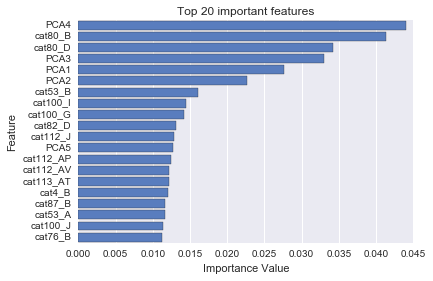

In [118]:
sns.set_color_codes("muted")
sns.barplot(x="importance",y="feature",data=important_features_df.head(20),color="b")

pp.xlabel("Importance Value")
pp.ylabel("Feature")
pp.title("Top 20 important features")
pp.show()

## Top 500 features for gradient boosting

In [108]:
model = clfs['gb']['clf'].fit(final_train,log_loss)

In [ ]:
feature_impportances =  sorted(zip(clfs['gb']['clf'].feature_importances_,final_train.columns.values),reverse=True)
important_features_df = pd.DataFrame(feature_impportances,columns=["importance","feature"])
top_500_important_features_train = final_train[final_train[important_features_df["feature"]].columns[:501]]

In [110]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(top_500_important_features_train,log_loss,test_size=0.3,random_state = 50)

In [111]:
model = clfs['gb']['clf'].fit(X_train2,y_train2)
predict_rfc = clfs['gb']['clf'].predict(X_test2)
clfs['gb']['variance score_test'] = clfs['gb']['clf'].score(X_test2,y_test2)
clfs['gb']['variance score_train'] = clfs['gb']['clf'].score(X_train2,y_train2)

print("Variance Score for test:" + clfs['gb']['name'] + " : %0.4f " % (clfs['gb']['variance score_test']))
print("Variance Score for train:" + clfs['gb']['name'] + " : %0.4f " % (clfs['gb']['variance score_train']))

clfs['gb']['mse'] = (np.mean((predict_rfc - y_test2) ** 2))
print("MSE for: " + clfs['rfc']['name'] + " : %0.4f " % (clfs['gb']['mse']))

Variance Score for test:Gradient Boosting : 0.5280 
Variance Score for train:Gradient Boosting : 0.5344 
MSE for: Random Forest  : 0.3067 


## Voting Classifier using mlp, gradient boosting, ridge, random forest

In [49]:
# from sklearn.ensemble import VotingClassifier
# clfs['voting'] = {'clf' : VotingClassifier(estimators=[('gb',clfs['gb']['clf']),('rfc',clfs['rfc']['clf']),
#                                                        ('ridge',clfs['ridge']['clf']),('mlp',clfs['mlp']['clf'])],
#                                                        voting='hard'),'name':'Voting Classifier'}

from sklearn.ensemble import VotingClassifier
clfs['voting'] = {'clf' : VotingClassifier(estimators=[('ridge',clfs['ridge']['clf']),('mlp',clfs['mlp']['clf'])],
                                                       voting='hard'),'name':'Voting Classifier'}

In [54]:
# clfs['voting']['variance score'] = clfs['voting']['clf'].score(X_test,y_test)
# print("Variance Score:" + clfs['voting']['name'] + " : %0.4f " % (clfs['voting']['variance score']))

# clfs['voting']['mse'] = (np.mean((predict_rfc - y_test2) ** 2))
# print("MSE for: " + clfs['voting']['name'] + " : %0.4f " % (clfs['voting']['mse']))

## Testing classifiers on test data 

In [55]:
clfs['gb']['clf'].fit(final_train,loss)
predicted = clfs['gb']['clf'].predict(final_test)
pred_df = pd.DataFrame(predicted,columns=['loss'])
test_id_df = pd.Series.to_frame(test_id)
output = pd.concat((test_id_df,pred_df),axis=1)

output.to_csv('Gradient Boosting Result.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)

In [56]:
clfs['rfc']['clf'].fit(final_train,loss)
predicted = clfs['rfc']['clf'].predict(final_test)
pred_df = pd.DataFrame(predicted,columns=['loss'])
test_id_df = pd.Series.to_frame(test_id)
output = pd.concat((test_id_df,pred_df),axis=1)

output.to_csv('Random Forest Result.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)

In [61]:
clfs['mlp']['clf'].fit(final_train,loss)
predicted = clfs['mlp']['clf'].predict(final_test)
pred_df = pd.DataFrame(predicted,columns=['loss'])
test_id_df = pd.Series.to_frame(test_id)
output = pd.concat((test_id_df,pred_df),axis=1)

# output.to_csv('MLP Result.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)
output.to_csv('MLP Result_new.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)

In [58]:
clfs['ridge']['clf'].fit(final_train,loss)
predicted = clfs['ridge']['clf'].predict(final_test)
pred_df = pd.DataFrame(predicted,columns=['loss'])
test_id_df = pd.Series.to_frame(test_id)
output = pd.concat((test_id_df,pred_df),axis=1)

output.to_csv('Ridge Regression Result.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)

In [ ]:
# clfs['voting']['clf'].fit(final_train,loss)
# predicted = clfs['voting']['clf'].predict(final_test)
# pred_df = pd.DataFrame(predicted,columns=['loss'])
# test_id_df = pd.Series.to_frame(test_id)
# output = pd.concat((test_id_df,pred_df),axis=1)

# output.to_csv('Voting Classifier Result.csv',sep=',',encoding='utf-8',header=['id','loss'],index=False)